In [2]:
from sklearn.datasets import load_iris
iris= load_iris()

In [3]:
iris.keys()


['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [4]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

data from first 5 columns

In [7]:
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [8]:
print(iris['DESCR'] + "\n")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
iris['data'].shape

(150, 4)

In [10]:
iris['target'].shape

(150,)

In [11]:
X= iris['data']
y= iris['target']

instantiate KNN classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier


knn= KNeighborsClassifier(n_neighbors=1)

see default settings

In [13]:
print knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [14]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [15]:
knn.predict([3, 4, 5, 2])

/home/danny/tomtom/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

In [16]:
X_new= ([3, 4, 5, 2], [4, 3, 2, 0.1])

In [17]:
prediction_1= knn.predict(X_new)
prediction_1

array([2, 0])

Get labels for prediction

In [18]:
iris['target_names'][prediction_1]

array(['virginica', 'setosa'], 
      dtype='|S10')

using different value of K

In [19]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
knn.predict(X_new)

array([1, 0])

applying logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()

logreg.fit(X, y)



logreg.predict(X_new)

array([2, 0])

Okay, we've been working on using the whole dataset. Now we're going to divide the dataset into training and testing 
dataset to estimate the accuracy of the model

In [22]:
y_pred= logreg.predict(X)

len(y_pred)

150

In [23]:
from sklearn import metrics
print metrics.accuracy_score(y_pred, y)

0.96


above is classification accuracy on whole dataset, let's try train/split

In [24]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 4)

/home/danny/tomtom/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
print X_train.shape
print X_test.shape
print
print y_train.shape
print y_test.shape

(90, 4)
(60, 4)

(90,)
(60,)


In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_pred= logreg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.95


using knn

In [28]:
k_range= range(1, 30)
scores= []

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

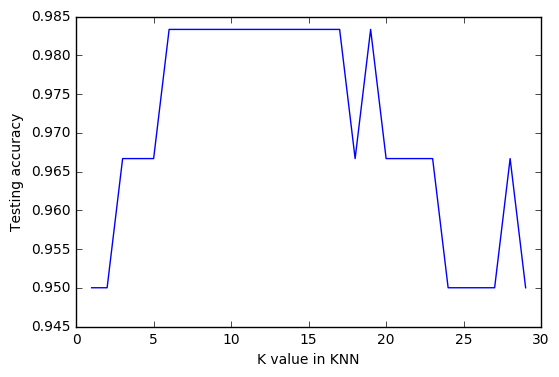

In [29]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('K value in KNN')
plt.ylabel('Testing accuracy')

best value of K to select is 5<K<17
=> K= (6+11)/2 = 11

#################################################
################################################

CROSS VALIDATION TO GET BEST GUESS FOR OUT OF SAMPLE ACCURACY

In [33]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn= KNeighborsClassifier(n_neighbors=5)
scores= cross_val_score(knn, X, y, cv=10, scoring= 'accuracy')

print scores
print
print "The final cv score is {}".format(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]

The final cv score is 0.966666666667


In [39]:
k_range= range(1, 31)
k_scores= []

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    scores= cross_val_score(knn, X, y, cv=10, scoring= 'accuracy')
    k_scores.append(scores.mean())
    print k_scores

[0.95999999999999996]
[0.95999999999999996, 0.95333333333333337]
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656]
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656]
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656]
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656]
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656]
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656]
[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338]
[0.95999999999999996, 0.95333333333333337, 0.9

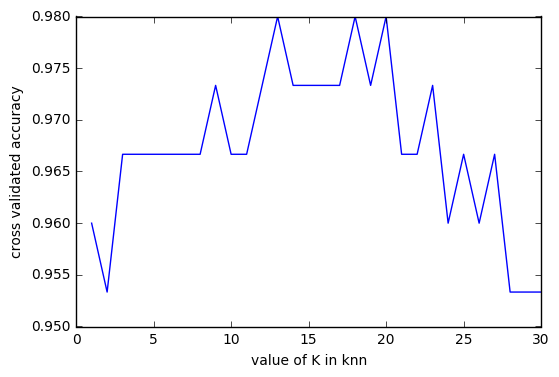

In [40]:
plt.plot(k_range, k_scores)
plt.xlabel('value of K in knn')
plt.ylabel('cross validated accuracy')

we take largest K to get least complex model

COMPARING MODELS

In [41]:
knn= KNeighborsClassifier(n_neighbors=20)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.98


In [42]:
logreg= LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.953333333333


USING GRIDSEARCH TO GET BEST PARAMETERS

In [44]:
from sklearn.grid_search import GridSearchCV
k_range= range(1, 31)
print k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [45]:
param_grid= dict(n_neighbors= k_range)
print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [50]:
grid= GridSearchCV(knn, param_grid=param_grid, cv=10, scoring='accuracy')

In [51]:
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [52]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [54]:
grid_mean_scores= [result.mean_validation_score for result in grid.grid_scores_]

print grid_mean_scores

[0.96, 0.9533333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.98, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.98, 0.9733333333333334, 0.98, 0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.96, 0.9666666666666667, 0.96, 0.9666666666666667, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


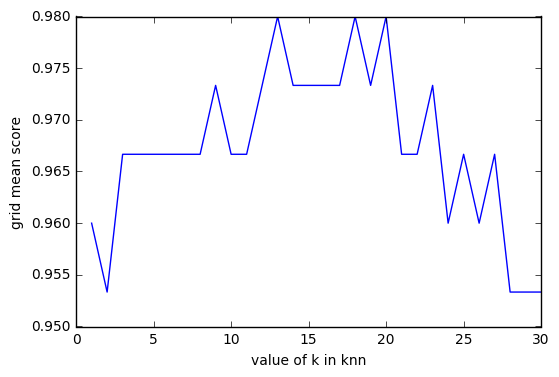

In [55]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel("value of k in knn")
plt.ylabel("grid mean score")

In [57]:
print grid.best_score_
print "=========================================================="
print grid.best_params_
print "=========================================================="
print grid.best_estimator_
print "=========================================================="

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


searching multiple parameters

In [65]:
k_range= range(1, 31)
weight_options= ['uniform', 'distance']

param_grid= dict(n_neighbors= k_range, weights= weight_options)

print param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [66]:
grid= GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [67]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [68]:
print grid.best_score_
print "=========================================================="
print grid.best_params_
print "=========================================================="
print grid.best_estimator_
print "=========================================================="

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


In [73]:
pred_new= grid.predict([3, 4, 5, 2])

print pred_new

[1]


/home/danny/tomtom/local/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [74]:
iris['target_names'][pred_new]

array(['versicolor'], 
      dtype='|S10')

USING RANDOMCV SEARCH. USEUFL WHEN COMPUTATION OF GRIDCV IS TOO COSTLY

In [76]:
from sklearn.grid_search import RandomizedSearchCV

In [77]:
param_grid= dict(n_neighbors= k_range, weights= weight_options)

In [81]:
rand = RandomizedSearchCV(knn, param_grid, cv=10, n_iter= 10, random_state= 5, scoring='accuracy')

rand.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
          pre_dispatch='2*n_jobs', random_state=5, refit=True,
          scoring='accuracy', verbose=0)

In [82]:
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'n_neighbors': 18, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 24, 'weights': 'distance'},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 20, 'weights': 'uniform'},
 mean: 0.95333, std: 0.04269, params: {'n_neighbors': 28, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 19, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 20, 'weights': 'distance'}]

In [83]:
print grid.best_score_
print "=========================================================="
print grid.best_params_
print "=========================================================="
print grid.best_estimator_
print "=========================================================="

0.98
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
